In [1]:
# Initial imports
import pandas as pd
from pathlib import Path

In [2]:
# Data loading
file_path = Path("myopia.csv")
df_myopia = pd.read_csv(file_path)
df_myopia.head(10)

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0
5,6,1.744,22.139999,3.224,3.556,15.36,10,6,2,1,19,44,0,1,0
6,6,0.683,22.330000,3.186,3.654,15.49,12,7,2,1,8,36,0,1,0
7,6,1.272,22.389999,3.732,3.584,15.08,12,0,0,0,8,8,0,0,0
8,7,1.396,22.620001,3.464,3.408,15.74,4,0,3,1,3,12,0,0,0
9,6,0.972,22.740000,3.504,3.696,15.54,30,5,1,0,10,27,0,0,0


In [3]:
# List dataframe data types
df_myopia.dtypes

AGE            int64
SPHEQ        float64
AL           float64
ACD          float64
LT           float64
VCD          float64
SPORTHR        int64
READHR         int64
COMPHR         int64
STUDYHR        int64
TVHR           int64
DIOPTERHR      int64
MOMMY          int64
DADMY          int64
MYOPIC         int64
dtype: object

In [4]:
# Part 1 - Remove column MYOPIA, As this is unsupervised learning we need to remove column that is already clustered data
# Note: The target column is needed for supervised machine learning, but it will make an unsupervised model biased. 
# After all, the target column is effectively providing clusters already!

df_myopia = df_myopia.drop(columns=["MYOPIC"])
df_myopia.head(5)

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0


In [5]:
# Standardize the dataset

# Find null values
for column in df_myopia.columns:
    print(f"Column {column} has {df_myopia[column].isnull().sum()} null values")

Column AGE has 0 null values
Column SPHEQ has 0 null values
Column AL has 0 null values
Column ACD has 0 null values
Column LT has 0 null values
Column VCD has 0 null values
Column SPORTHR has 0 null values
Column READHR has 0 null values
Column COMPHR has 0 null values
Column STUDYHR has 0 null values
Column TVHR has 0 null values
Column DIOPTERHR has 0 null values
Column MOMMY has 0 null values
Column DADMY has 0 null values


In [6]:
# Find duplicate entries
print(f"Duplicate entries: {df_myopia.duplicated().sum()}")


Duplicate entries: 0


In [7]:
# Scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_myopia[['AGE','AL','ACD','LT','VCD','SPORTHR','READHR','COMPHR','STUDYHR',
                                                'TVHR','DIOPTERHR','MOMMY', 'DADMY']])

In [8]:
# Create a DataFrame with the transformed data
df_myopia_new = pd.DataFrame(scaled_data)
df_myopia_new.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.420219,-0.892861,0.483784,-0.281443,-1.019792,4.150661,1.697450,-0.689311,-0.672996,0.184058,0.498304,0.987138,1.003241
1,-0.420219,-0.171840,0.535910,-0.967997,-0.130763,-0.998898,-0.912062,-0.361875,-0.221409,-0.340932,-0.875088,0.987138,1.003241
2,-0.420219,-0.009977,-0.506628,-0.177812,0.215809,0.257092,-0.912062,-0.034439,-0.672996,0.184058,-0.750234,-1.013030,-0.996769
3,-0.420219,-0.436703,1.230936,0.456927,-0.974587,0.759488,2.676017,-0.689311,-0.672996,-0.865922,0.685585,-1.013030,1.003241
4,-1.823978,1.167204,0.422970,-0.566427,1.180178,0.257092,-0.912062,-0.689311,-0.672996,-0.865922,-1.374503,0.987138,-0.996769


In [9]:
# Part 2: Apply Dimensionality Reduction

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [10]:
# Initialize PCA model
pca = PCA(n_components=0.99)

# Get principal components for the data.
df_myopia_pca = pca.fit_transform(df_myopia_new)

df_myopia_pca

array([[ 0.2625174 ,  1.32577353,  0.56961278, ...,  0.21140805,
         0.97600269, -0.88831877],
       [-0.82319548, -1.46518009, -0.13448605, ..., -0.48779191,
         0.52804552,  0.50898831],
       [-0.81519351, -0.76351012,  0.47271703, ..., -0.0093    ,
         0.17800769,  0.0723901 ],
       ...,
       [-0.67414738, -2.4553551 , -0.10199131, ...,  0.24482007,
         0.51610914,  0.01565896],
       [-1.16187337,  0.56468797,  0.44545475, ..., -1.16027857,
        -0.86140041,  0.32870295],
       [-0.76524733, -0.66590059,  1.08741957, ...,  0.60334732,
         1.08322204, -0.31160808]])

In [11]:
# Initialize t-SNE model

from sklearn.manifold import TSNE
tsne = TSNE(learning_rate=35)

In [12]:
# Convert array to a dataframe
df_myopia_pca_new = pd.DataFrame(df_myopia_pca)

# Reduce dimensions
tsne_features = tsne.fit_transform(df_myopia_pca_new)

/Users/trupti/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


In [13]:
df_myopia_pca_new.head(5)

,0,1,2,3,4,5,6,7,8,9,10
0,0.262517,1.325774,0.569613,-0.874089,-2.677383,-3.486834,-0.160024,-1.254616,0.211408,0.976003,-0.888319
1,-0.823195,-1.465180,-0.134486,1.434543,-0.419663,-0.033931,-0.480902,0.484987,-0.487792,0.528046,0.508988
2,-0.815194,-0.763510,0.472717,-1.336578,0.606629,0.606932,-0.073025,-0.666318,-0.009300,0.178008,0.072390
3,0.038480,1.281816,-1.216853,-0.070243,-2.365058,-0.927685,1.286728,-1.039338,-0.833840,-1.269743,-0.576103
4,-0.589282,-2.803430,0.618836,-0.185126,0.488219,-0.955341,1.268772,-0.347763,0.664230,0.305770,0.987303


In [14]:
# The dataset has 2 columns
tsne_features.shape

(618, 2)

In [15]:
# Prepare to plot the dataset

# The first column of transformed features
df_myopia_pca_new['x'] = tsne_features[:,0]

# The second column of transformed features
df_myopia_pca_new['y'] = tsne_features[:,1]

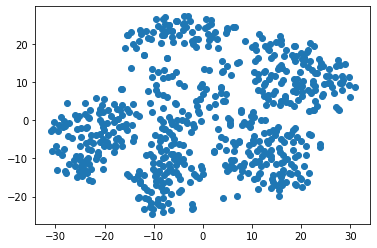

In [16]:
# Visualize the clusters
import matplotlib.pyplot as plt

plt.scatter(df_myopia_pca_new['x'], df_myopia_pca_new['y'])
plt.show()

In [17]:
#Part 3: Perform a Cluster Analysis with K-means

In [18]:
# Initializing model with K = 5
model = KMeans(n_clusters=5, random_state=5)

In [19]:
# Fitting model
model.fit(df_myopia_pca_new)

/Users/trupti/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


KMeans(n_clusters=5, random_state=5)

In [20]:
# Get predictions
predictions = model.predict(df_myopia_pca_new)
print(predictions)

[3 4 3 2 0 2 2 3 3 3 1 4 3 3 0 3 3 0 1 3 2 2 2 1 2 3 4 0 4 0 0 1 4 2 0 3 1
 2 2 2 4 3 1 1 0 2 1 2 0 1 4 2 2 0 2 2 4 4 2 2 2 0 1 2 1 0 3 2 3 0 0 4 1 3
 2 0 3 1 2 3 4 3 0 0 2 4 0 4 0 4 3 3 4 2 2 1 2 4 0 1 1 3 2 3 0 2 3 3 4 2 1
 2 1 4 4 4 3 2 4 2 4 3 4 3 1 0 3 0 4 0 0 2 1 3 4 2 3 0 3 2 0 2 4 2 4 4 2 1
 0 1 0 3 1 4 3 3 0 4 0 0 2 2 1 2 0 1 1 2 0 3 4 4 1 3 0 2 0 4 1 0 2 1 3 0 3
 1 0 4 2 4 4 0 4 2 4 2 3 2 4 0 0 0 2 3 3 4 0 2 4 4 1 0 4 4 0 0 1 2 2 1 4 2
 1 3 3 1 1 1 3 2 1 0 0 1 0 4 4 3 3 3 1 0 3 2 0 2 0 0 1 2 0 1 4 1 0 0 0 0 1
 2 1 3 0 4 4 3 4 4 3 2 2 3 1 1 2 0 2 0 1 3 4 1 4 1 4 0 3 0 2 3 3 2 0 3 1 3
 3 2 1 2 3 0 4 1 0 4 1 3 2 1 0 4 2 4 4 4 0 2 4 1 2 4 4 2 4 3 3 4 3 2 2 4 3
 4 4 3 4 0 2 2 0 2 3 0 0 0 0 1 1 2 3 2 4 3 3 2 4 2 0 3 4 4 3 2 2 4 3 2 3 2
 0 3 3 4 1 4 3 2 4 3 1 4 3 2 4 1 3 1 1 1 0 1 3 4 4 3 3 4 2 3 2 2 0 1 1 3 0
 1 1 2 0 0 4 1 2 3 4 2 3 2 4 1 2 0 1 4 3 0 0 2 1 0 3 3 4 1 0 0 4 1 0 4 3 1
 4 2 1 0 3 1 1 1 4 1 3 1 3 2 4 1 4 2 2 4 1 2 4 1 2 0 0 1 3 0 1 0 0 3 3 4 0
 0 4 1 2 4 3 1 4 1 1 3 3 

/Users/trupti/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [21]:
# Add a new class column to df_iris
df_myopia_pca_new["class"] = model.labels_
df_myopia_pca_new.head()

,0,1,2,3,4,5,6,7,8,9,10,x,y,class
0,0.262517,1.325774,0.569613,-0.874089,-2.677383,-3.486834,-0.160024,-1.254616,0.211408,0.976003,-0.888319,2.280070,-8.167159,3
1,-0.823195,-1.465180,-0.134486,1.434543,-0.419663,-0.033931,-0.480902,0.484987,-0.487792,0.528046,0.508988,20.885614,15.617528,4
2,-0.815194,-0.763510,0.472717,-1.336578,0.606629,0.606932,-0.073025,-0.666318,-0.009300,0.178008,0.072390,-7.745811,-9.774191,3
3,0.038480,1.281816,-1.216853,-0.070243,-2.365058,-0.927685,1.286728,-1.039338,-0.833840,-1.269743,-0.576103,-25.554989,-2.233379,2
4,-0.589282,-2.803430,0.618836,-0.185126,0.488219,-0.955341,1.268772,-0.347763,0.664230,0.305770,0.987303,21.675880,-3.738755,0


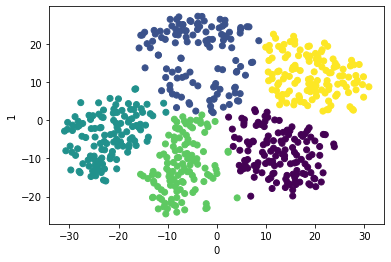

In [22]:
plt.scatter(x=df_myopia_pca_new["x"], y=df_myopia_pca_new['y'], c=df_myopia_pca_new['class'])
plt.xlabel('0')
plt.ylabel('1')
plt.show()

/Users/trupti/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/trupti/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/trupti/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/trupti/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised i

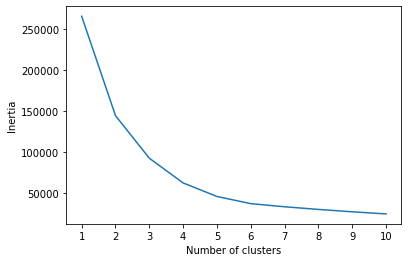

In [23]:
inertia = []
# Same as k = list(range(1, 11))
k = [1,2,3,4,5,6,7,8,9,10]


# Looking for the best k
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(df_myopia_pca_new)
    inertia.append(km.inertia_)

# Define a DataFrame to plot the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [24]:
# Part 4: Findings

# Based on the analysis, 5 clusters were identified but these clusters were inconclusive and definative K value 
# could not be determined